# Stack Overflow: Tag Prediction

<h1>1. Business Problem </h1>

<h2> 1.1 Description </h2>

<p style='font-size:18px'><b> Description </b></p>
<p>
Stack Overflow is the largest, most trusted online community for developers to learn, share their programming knowledge, and build their careers.<br />
<br />
Stack Overflow is something which every programmer use one way or another. Each month, over 50 million developers come to Stack Overflow to learn, share their knowledge, and build their careers. It features questions and answers on a wide range of topics in computer programming. The website serves as a platform for users to ask and answer questions, and, through membership and active participation, to vote questions and answers up or down and edit questions and answers in a fashion similar to a wiki or Digg. As of April 2014 Stack Overflow has over 4,000,000 registered users, and it exceeded 10,000,000 questions in late August 2015. Based on the type of tags assigned to questions, the top eight most discussed topics on the site are: Java, JavaScript, C#, PHP, Android, jQuery, Python and HTML.<br />
<br />
</p>

<p style='font-size:18px'><b> Problem Statemtent </b></p>
Suggest the tags based on the content that was there in the question posted on Stackoverflow.

<p style='font-size:18px'><b> Source:  </b> https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/</p>


<h2> 1.2 Source / useful links </h2>

Data Source : https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/data <br>
Youtube : https://youtu.be/nNDqbUhtIRg <br>
Research paper : https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/tagging-1.pdf <br>
Research paper : https://dl.acm.org/citation.cfm?id=2660970&dl=ACM&coll=DL

<h2> 1.3 Real World / Business Objectives and Constraints </h2>

1. Predict as many tags as possible with high precision and recall.
2. Incorrect tags could impact customer experience on StackOverflow.
3. No strict latency constraints.

<h1>2. Machine Learning problem </h1>

<h2> 2.1 Data </h2>

<h3> 2.1.1 Data Overview </h3>

Refer: https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/data
<br>
All of the data is in 2 files: Train and Test.<br />
<pre>
<b>Train.csv</b> contains 4 columns: Id,Title,Body,Tags.<br />
<b>Test.csv</b> contains the same columns but without the Tags, which you are to predict.<br />
<b>Size of Train.csv</b> - 6.75GB<br />
<b>Size of Test.csv</b> - 2GB<br />
<b>Number of rows in Train.csv</b> = 6034195<br />
</pre>
The questions are randomized and contains a mix of verbose text sites as well as sites related to math and programming. The number of questions from each site may vary, and no filtering has been performed on the questions (such as closed questions).<br />
<br />


__Data Field Explaination__

Dataset contains 6,034,195 rows. The columns in the table are:<br />
<pre>
<b>Id</b> - Unique identifier for each question<br />
<b>Title</b> - The question's title<br />
<b>Body</b> - The body of the question<br />
<b>Tags</b> - The tags associated with the question in a space-seperated format (all lowercase, should not contain tabs '\t' or ampersands '&')<br />
</pre>

<br />

<h3>2.1.2 Example Data point </h3>

<pre>
<b>Title</b>:  Implementing Boundary Value Analysis of Software Testing in a C++ program?
<b>Body </b>: <pre><code>
        #include&lt;
        iostream&gt;\n
        #include&lt;
        stdlib.h&gt;\n\n
        using namespace std;\n\n
        int main()\n
        {\n
                 int n,a[n],x,c,u[n],m[n],e[n][4];\n         
                 cout&lt;&lt;"Enter the number of variables";\n         cin&gt;&gt;n;\n\n         
                 cout&lt;&lt;"Enter the Lower, and Upper Limits of the variables";\n         
                 for(int y=1; y&lt;n+1; y++)\n         
                 {\n                 
                    cin&gt;&gt;m[y];\n                 
                    cin&gt;&gt;u[y];\n         
                 }\n         
                 for(x=1; x&lt;n+1; x++)\n         
                 {\n                 
                    a[x] = (m[x] + u[x])/2;\n         
                 }\n         
                 c=(n*4)-4;\n         
                 for(int a1=1; a1&lt;n+1; a1++)\n         
                 {\n\n             
                    e[a1][0] = m[a1];\n             
                    e[a1][1] = m[a1]+1;\n             
                    e[a1][2] = u[a1]-1;\n             
                    e[a1][3] = u[a1];\n         
                 }\n         
                 for(int i=1; i&lt;n+1; i++)\n         
                 {\n            
                    for(int l=1; l&lt;=i; l++)\n            
                    {\n                 
                        if(l!=1)\n                 
                        {\n                    
                            cout&lt;&lt;a[l]&lt;&lt;"\\t";\n                 
                        }\n            
                    }\n            
                    for(int j=0; j&lt;4; j++)\n            
                    {\n                
                        cout&lt;&lt;e[i][j];\n                
                        for(int k=0; k&lt;n-(i+1); k++)\n                
                        {\n                    
                            cout&lt;&lt;a[k]&lt;&lt;"\\t";\n               
                        }\n                
                        cout&lt;&lt;"\\n";\n            
                    }\n        
                 }    \n\n        
                 system("PAUSE");\n        
                 return 0;    \n
        }\n
        </code></pre>\n\n
        <p>The answer should come in the form of a table like</p>\n\n
        <pre><code>       
        1            50              50\n       
        2            50              50\n       
        99           50              50\n       
        100          50              50\n       
        50           1               50\n       
        50           2               50\n       
        50           99              50\n       
        50           100             50\n       
        50           50              1\n       
        50           50              2\n       
        50           50              99\n       
        50           50              100\n
        </code></pre>\n\n
        <p>if the no of inputs is 3 and their ranges are\n
        1,100\n
        1,100\n
        1,100\n
        (could be varied too)</p>\n\n
        <p>The output is not coming,can anyone correct the code or tell me what\'s wrong?</p>\n'
<b>Tags </b>: 'c++ c'
</pre>

<h2>2.2 Mapping the real-world problem to a Machine Learning Problem </h2>

<h3> 2.2.1 Type of Machine Learning Problem </div></h3>

<div style ="background-color:#FBF697;">
<p> It is a multi-label classification problem  <br>
<b>Multi-label Classification</b>: Multilabel classification assigns to each sample a set of target labels. This can be thought as predicting properties of a data-point that are not mutually exclusive, such as topics that are relevant for a document. A question on Stackoverflow might be about any of C, Pointers, FileIO and/or memory-management at the same time or none of these. <br>
__Credit__: http://scikit-learn.org/stable/modules/multiclass.html
</p>
</div>

<h3> 2.2.2 Performance metric </div></h3>

<div style ="background-color:#FBF697;">
<b>Micro-Averaged F1-Score (Mean F Score) </b>: 
The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

<i>F1 = 2 * (precision * recall) / (precision + recall)</i><br>

In the multi-class and multi-label case, this is the weighted average of the F1 score of each class. <br>

<b>'Micro f1 score': </b><br>
Calculate metrics globally by counting the total true positives, false negatives and false positives. This is a better metric when we have class imbalance.
<br>

<b>'Macro f1 score': </b><br>
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
<br>

https://www.kaggle.com/wiki/MeanFScore <br>
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html <br>
<br>
<b> Hamming loss </b>: The Hamming loss is the fraction of labels that are incorrectly predicted. <br>
https://www.kaggle.com/wiki/HammingLoss <br>
</div>

<h3>Importing.... </h3>

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import sqlite3
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import re
import os
from tqdm import tqdm
from sqlalchemy import create_engine # database connection
import datetime as dt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from skmultilearn.adapt import mlknn
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB
from datetime import datetime

<h1> 3. Exploratory Data Analysis </h1><ddiv>

<h2> 3.1 Data Loading and Cleaning </h2></div>

<h3>3.1.1 Using Pandas with SQLite to Load the data</h3></div>

In [3]:
#Creating db file from csv
#Learn SQL: https://www.w3schools.com/sql/default.asp
#Since data size is too large, we are taking data batch-wise(chunksize) and putting it in the sqlite database
if not os.path.isfile('train.db'):
    database = create_engine('sqlite:///train.db')
    chunksize = 180000
    k = 0
    index = 1
    for data_frame in tqdm(pd.read_csv('data/Train.csv',\
                               names=['Id', 'Title', 'Body', 'Tags'], chunksize=chunksize, \
                               iterator=True, encoding='utf-8' )):
        data_frame.index += index
        k += 1
        print('total rows completed in {} iteration : {} '.format(k,k*chunksize))
        data_frame.to_sql('dataInit', database, if_exists='append')
        index = data_frame.index[-1] + 1    

<h3> 3.1.2 Counting the number of rows </h3></div>

In [2]:
connection = sqlite3.connect('train.db')
num_rows = pd.read_sql_query("""SELECT count(*) FROM dataInit""", connection)
print("Number of rows in the database :",num_rows['count(*)'].values[0])
connection.close()

Number of rows in the database : 6034196


<h3>3.1.3 Checking for duplicates </h3></div>

In [3]:
#Learn SQl: https://www.w3schools.com/sql/default.asp
connection = sqlite3.connect('train.db')
no_dup_data = pd.read_sql_query('SELECT Title, Body, Tags, COUNT(*) as count_dup FROM dataInit GROUP BY Title, Body, Tags', connection)
connection.close()

print(no_dup_data.shape)

(4206315, 4)


In [4]:
count_dup = num_rows['count(*)'].values[0] - no_dup_data.shape[0]
print("Number of duplicate questions :", count_dup, "( percentage :",(count_dup/(num_rows['count(*)'].values[0]))*100,"% )")

Number of duplicate questions : 1827881 ( percentage : 30.292038906260256 % )


--> Since more than 30% of the total data is duplicate entries.SO we need to remove them from dataset.

<h3>3.1.4 Number of times unique questions appeared in our database </h3></div>

In [5]:
no_dup_data.count_dup.value_counts()

1    2656284
2    1272336
3     277575
4         90
5         25
6          5
Name: count_dup, dtype: int64

<h3>3.1.5 No of Tags as a feature</h3></div>

In [6]:
# dropping the rows where Tags column is empty, as this is the train data
no_dup_data.dropna(how='any',axis=0,inplace=True)

In [8]:
no_dup_data["tag_count"] = no_dup_data["Tags"].apply(lambda text: len(text.split(" ")))
no_dup_data.head()

,Title,Body,Tags,count_dup,tag_count
0,Implementing Boundary Value Analysis of S...,<pre><code>#include&lt;iostream&gt;\n#include&...,c++ c,1,2
1,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding,1,3
2,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding columns,1,4
3,java.lang.NoClassDefFoundError: javax/serv...,"<p>I followed the guide in <a href=""http://sta...",jsp jstl,1,2
4,java.sql.SQLException:[Microsoft][ODBC Dri...,<p>I use the following code</p>\n\n<pre><code>...,java jdbc,2,2


<h3>3.1.6 Distribution of number of tags</h3></div>

In [9]:
no_dup_data.tag_count.value_counts()

3    1206157
2    1111706
4     814996
1     568291
5     505158
Name: tag_count, dtype: int64

<div style ="color:#691716;font-weight:bold"> Creating database with no duplicates </div>

In [10]:
if not os.path.isfile('train_no_dup.db'):
    db_ = create_engine("sqlite:///train_no_dup.db")
    no_duplicate = pd.DataFrame(no_dup_data, columns=['Title', 'Body', 'Tags'])
    no_duplicate.to_sql('no_dup_train', db_)

In [11]:
connection = sqlite3.connect('train_no_dup.db')
data_tags = pd.read_sql_query("""SELECT Tags FROM no_dup_train""", connection)
connection.close()

In [12]:
data_tags.drop(data_tags.index[0], inplace=True)
print(data_tags.head())

                                  Tags
1          c# silverlight data-binding
2  c# silverlight data-binding columns
3                             jsp jstl
4                            java jdbc
5        facebook api facebook-php-sdk


<h2> 3.2 Analysis of Tags </div> </h2>

<h3>  3.2.1 Total number of unique tags </div></h3>

In [13]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
tag_counter = vectorizer.fit_transform(data_tags['Tags'])

print("Number of data points :", tag_counter.shape[0])
print("Number of unique tags :", tag_counter.shape[1])

Number of data points : 4206314
Number of unique tags : 42048


In [14]:
tags = vectorizer.get_feature_names()
print("Some of the tags we have :", tags[:20])

Some of the tags we have : ['.a', '.app', '.asp.net-mvc', '.aspxauth', '.bash-profile', '.class-file', '.cs-file', '.doc', '.drv', '.ds-store', '.each', '.emf', '.exe', '.exe.config', '.hgtags', '.htaccess', '.htpasswd', '.ico', '.lib', '.lrc']


<h3> 3.2.2 Number of times a tag appeared </div> </h3>

In [15]:
# https://stackoverflow.com/questions/15115765/how-to-access-sparse-matrix-elements
#Lets now store the document term matrix in a dictionary.
freq = tag_counter.sum(axis=0).A1
result = dict(zip(tags, freq))

In [16]:
#Saving this dictionary to csv files.
if not os.path.isfile('tag_counts_dict.csv'):
    with open('tag_counts_dict.csv', 'w') as csv_file:
        writer = csv.writer(csv_file)
        for key, value in result.items():
            writer.writerow([key, value])
else:
    tag_data = pd.read_csv("tag_counts_dict.csv", names=['Tags', 'Counts'])
    tag_data.head()

,Tags,Counts
0,.a,18
1,.app,37
2,.asp.net-mvc,1
3,.aspxauth,21
4,.bash-profile,138


<h3> 3.2.3 Distribution of Number of Tags</div> </h3>

In [17]:
tag_data_sorted = tag_data.sort_values(['Counts'], ascending=False)
tag_count = tag_data_sorted['Counts'].values

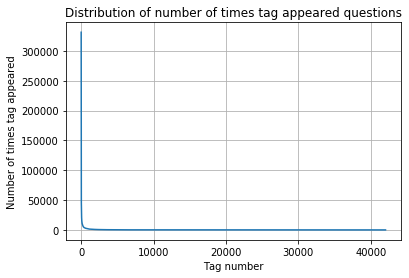

In [9]:
plt.plot(tag_count)
plt.title("Distribution of number of times tag appeared questions")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

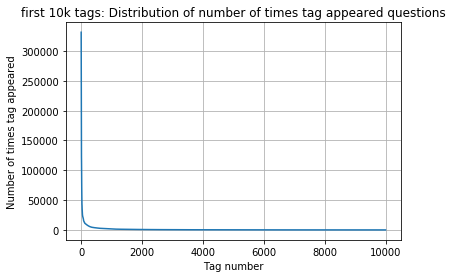

In [10]:
plt.plot(tag_count[0:10000])
plt.title('first 10k tags: Distribution of number of times tag appeared in questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()
# print(len(tag_count[0:10000:25]), tag_count[0:10000:25])

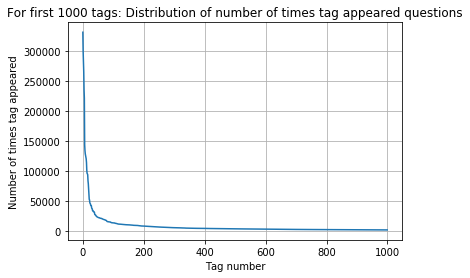

In [11]:
plt.plot(tag_count[0:1000])
plt.title('For first 1000 tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()
# print(len(tag_count[0:1000:5]), tag_count[0:1000:5])

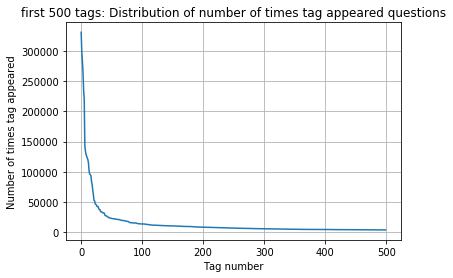

In [12]:
plt.plot(tag_count[0:500])
plt.title('first 500 tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()
# print(len(tag_count[0:500:5]), tag_count[0:500:5])

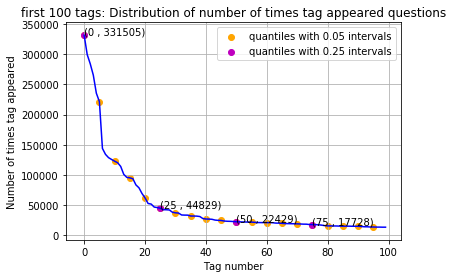

In [13]:
plt.plot(tag_count[0:100], c='b')
plt.scatter(x=list(range(0,100,5)), y=tag_count[0:100:5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=list(range(0,100,25)), y=tag_count[0:100:25], c='m', label = "quantiles with 0.25 intervals")

for x,y in zip(list(range(0,100,25)), tag_count[0:100:25]):
    plt.annotate(s="({} , {})".format(x,y), xy=(x,y), xytext=(x-0.05, y+500))

plt.title('first 100 tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.legend()
plt.show()
# print(len(tag_count[0:100:5]), tag_count[0:100:5])

In [14]:
# Store tags greater than 10K in one list
tag_count_10k = tag_data[tag_data.Counts>10000].Tags
print ('{} Tags are used more than 10000 times'.format(len(tag_count_10k)))

# Store tags greater than 100K in one list
tag_count_100k = tag_data[tag_data.Counts>100000].Tags
print ('{} Tags are used more than 100000 times'.format(len(tag_count_100k)))

153 Tags are used more than 10000 times
14 Tags are used more than 100000 times


<b>Observations:</b><br />
1. There are total 153 tags which are used more than 10000 times.
2. 14 tags are used more than 100000 times.
3. Most frequent tag (i.e. c#) is used 331505 times.
4. Since some tags occur much more frequenctly than others, Micro-averaged F1-score is the appropriate metric for this problem as it caters for the class imbalance problem.

<h3> 3.2.4 Tags Per Question  </h3>

In [18]:
#Storing the count of tag in each question in list 'tag_count'
tag_per_quest_count = tag_counter.sum(axis=1).tolist()
#Converting list of lists into single list, we will get [[3], [4], [2], [2], [3]] and we are converting this to [3, 4, 2, 2, 3]
tag_per_quest_count=[int(j) for i in tag_per_quest_count for j in i]
print ('We have total {} datapoints.'.format(len(tag_per_quest_count)))

We have total 4206314 datapoints.


In [19]:
print( "Maximum number of tags per question: %d"%max(tag_per_quest_count))
print( "Minimum number of tags per question: %d"%min(tag_per_quest_count))
print( "Avg. number of tags per question: %f"% ((sum(tag_per_quest_count)*1.0)/len(tag_per_quest_count)))

Maximum number of tags per question: 5
Minimum number of tags per question: 1
Avg. number of tags per question: 2.899440


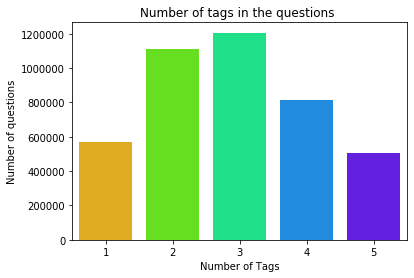

In [20]:
sns.countplot(tag_per_quest_count, palette='gist_rainbow')
plt.title("Number of tags in the questions ")
plt.xlabel("Number of Tags")
plt.ylabel("Number of questions")
plt.show()

<b>Observations:</b><br />
1. Maximum number of tags per question: 5
2. Minimum number of tags per question: 1
3. Avg. number of tags per question: 2.899
4. Most of the questions are having 2 or 3 tags

<h3>3.2.5 Most Frequent Tags </h3>

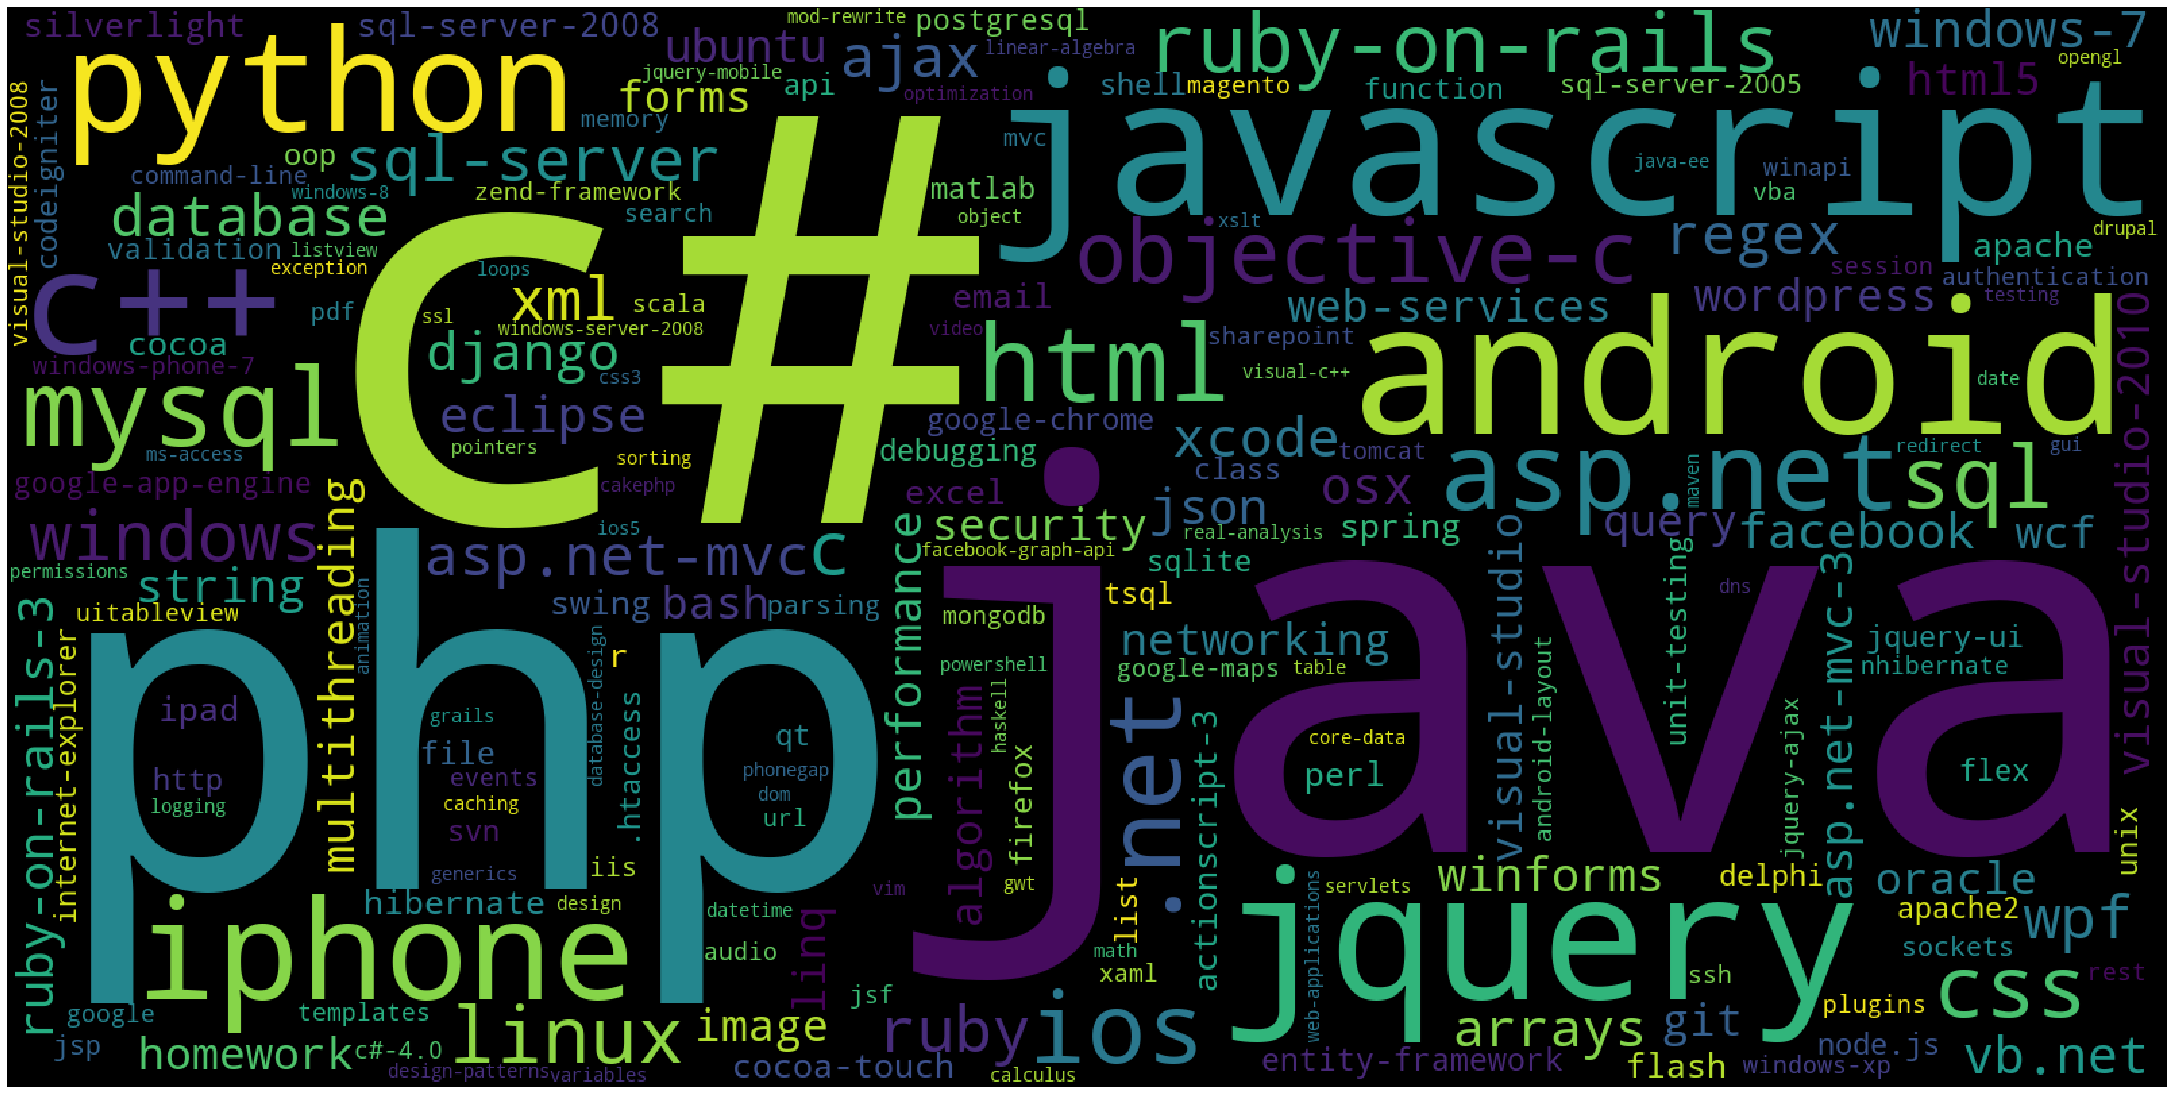

In [18]:
# Lets first convert the 'result' dictionary to 'list of tuples'
tuples = dict(result.items())
#Initializing WordCloud using frequencies of tags.
wordcloud = WordCloud(    background_color='black',
                          width=1600,
                          height=800,
                    ).generate_from_frequencies(tuples)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("tag.png")
plt.show()

<b>Observations:</b><br />
A look at the word cloud shows that "c#", "java", "php", "asp.net", "javascript", "c++" are some of the most frequent tags.

<h3> 3.2.6 The top 20 tags </h3>

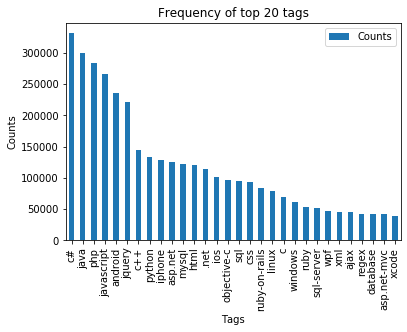

In [21]:
i_=np.arange(30)
tag_data_sorted.head(30).plot(kind='bar')
plt.title('Frequency of top 20 tags')
plt.xticks(i_, tag_data_sorted['Tags'])
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.show()

<b>Observations:</b><br />
1. Majority of the most frequent tags are programming language.
2. C# is the top most frequent programming language.
3. Android, IOS, Linux and windows are among the top most frequent operating systems.

<h3> 3.3 Cleaning and preprocessing of Questions </h3>

<h3> 3.3.1 Preprocessing </h3>

<ol> 
    <li> Sample 1M data points </li>
    <li> Separate out code-snippets from Body </li>
    <li> Remove Special characters from Question title and description (not in code)</li>
    <li> Remove stop words (Except 'C') </li>
    <li> Remove HTML Tags </li>
    <li> Convert all the characters into small letters </li>
    <li> Use SnowballStemmer to stem the words </li>
</ol>

In [2]:
def html_strip(data):
    cleaner = re.compile('<.*?>')
    cleantext = re.sub(cleaner, ' ', str(data))
    return cleantext
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")

#http://www.sqlitetutorial.net/sqlite-python/create-tables/
def db_connector(db_file):
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
    return None

def create_table(connect, create_table_sql):
    """ create a table from the create_table_sql statement
    :param conn: Connection object
    :param create_table_sql: a CREATE TABLE statement
    :return:
    """
    try:
        c = connect.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
        
def checkTableExists(db_con):
    cursor = db_con.cursor()
    strg = "select name from sqlite_master where type='table'"
    table_names = cursor.execute(strg)
    print("Tables in the databse:", table_names)
    tables = table_names.fetchall() 
    print("1st table :",tables[0][0])
    return(len(tables))

def create_database_table(database, query):
    conn = db_connector(database)
    if conn is not None:
        create_table(conn, query)
        checkTableExists(conn)
    else:
        print("Error! cannot create the database connection.")
    conn.close()

In [3]:
sql_create_table = """CREATE TABLE IF NOT EXISTS QuestionsPreprocessed (question text NOT NULL, code text, tags text, words_pre integer, words_post integer, is_code integer);"""
QuestionsProcessed = create_database_table("Pre_Processed.db", sql_create_table)

Tables in the databse: <sqlite3.Cursor object at 0x000000EB4C4B8D50>
1st table : QuestionsPreprocessed


__ we create a new data base to store the preprocessed and sampled  questions(Title + question ) __

In [7]:
# http://www.sqlitetutorial.net/sqlite-delete/
# https://stackoverflow.com/questions/2279706/select-random-row-from-a-sqlite-table
read_db = 'train_no_dup.db'
write_db = 'Pre_Processed.db'
if os.path.isfile(read_db):
    conn_r = db_connector(read_db)
    if conn_r is not None:
        reader =conn_r.cursor()
        reader.execute("SELECT Title, Body, Tags From no_dup_train ORDER BY RANDOM() LIMIT 300001;")

#writing 1000000 points randomly from no_dup_train table (in train_no_dup.db) to  QuestionsPreprocessed table (in PreProcessed.db)
if os.path.isfile(write_db):
    conn_w = db_connector(write_db)
    if conn_w is not None:
        tables = checkTableExists(conn_w)
        writer = conn_w.cursor()
        if tables != 0:
            writer.execute("DELETE FROM QuestionsPreprocessed WHERE 1")
            print("Cleared All the rows")
            
#http://www.bernzilla.com/2008/05/13/selecting-a-random-row-from-an-sqlite-table/
preprocessed_data_list=[]
reader.fetchone()
questions_with_code=0
len_pre=0
len_post=0
questions_processed = 0
for row in reader:
    is_code = 0
    title, question, tags = row[0], row[1], row[2]
    if '<code>' in question:
        questions_with_code+=1
        is_code = 1
    x = len(question)+len(title)
    len_pre+=x
    code = str(re.findall(r'<code>(.*?)</code>', question, flags=re.DOTALL))
    question=re.sub('<code>(.*?)</code>', '', question, flags=re.MULTILINE|re.DOTALL)
    question=html_strip(question.encode('utf-8'))
    title=title.encode('utf-8')
    question=str(title)+" "+str(question)
    question=re.sub(r'[^A-Za-z]+',' ',question)
    words=word_tokenize(str(question.lower()))

    #Removing all single letter and and stopwords from question exceptt for the letter 'c'
    question=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))

    len_post+=len(question)
    tup = (question,code,tags,x,len(question),is_code)
    questions_processed += 1
    writer.execute("insert into QuestionsPreprocessed(question,code,tags,words_pre,words_post,is_code) values (?,?,?,?,?,?)",tup)
    if (questions_processed%100000==0):
        print("number of questions completed=",questions_processed)

no_dup_avg_len_pre=(len_pre*1.0)/questions_processed
no_dup_avg_len_post=(len_post*1.0)/questions_processed

print( "Avg. length of questions(Title+Body) before processing: %d"%no_dup_avg_len_pre)
print( "Avg. length of questions(Title+Body) after processing: %d"%no_dup_avg_len_post)
print ("Percent of questions containing code: %d"%((questions_with_code*100.0)/questions_processed))


Tables in the databse: <sqlite3.Cursor object at 0x000000A0817E2340>
1st table : QuestionsPreprocessed
Cleared All the rows
number of questions completed= 100000
number of questions completed= 200000
number of questions completed= 300000
Avg. length of questions(Title+Body) before processing: 1173
Avg. length of questions(Title+Body) after processing: 326
Percent of questions containing code: 57


In [25]:
# http://www.sqlitetutorial.net/sqlite-delete/
# https://stackoverflow.com/questions/2279706/select-random-row-from-a-sqlite-table
read_db = 'train_no_dup.db'
write_db = 'Pre_Processed.db'
if os.path.isfile(read_db):
    conn_r = db_connector(read_db)
    if conn_r is not None:
        reader =conn_r.cursor()
        reader.execute("SELECT Title, Body, Tags From no_dup_train ORDER BY RANDOM() LIMIT 500001;")

#writing 1000000 points randomly from no_dup_train table (in train_no_dup.db) to  QuestionsPreprocessed table (in PreProcessed.db)
if os.path.isfile(write_db):
    conn_w = db_connector(write_db)
    if conn_w is not None:
        tables = checkTableExists(conn_w)
        writer = conn_w.cursor()
        if tables != 0:
            writer.execute("DELETE FROM QuestionsPreprocessed WHERE 1")
            print("Cleared All the rows")
            
#http://www.bernzilla.com/2008/05/13/selecting-a-random-row-from-an-sqlite-table/
preprocessed_data_list=[]
reader.fetchone()
questions_with_code=0
len_pre=0
len_post=0
questions_processed = 0
for row in reader:
    is_code = 0
    title, question, tags = row[0], row[1], row[2]
    if '<code>' in question:
        questions_with_code+=1
        is_code = 1
    x = len(question)+len(title)
    len_pre+=x
    code = str(re.findall(r'<code>(.*?)</code>', question, flags=re.DOTALL))
    question=re.sub('<code>(.*?)</code>', '', question, flags=re.MULTILINE|re.DOTALL)
    question=html_strip(question.encode('utf-8'))
    title=title.encode('utf-8')
    question=str(title)+" "+str(question)
    question=re.sub(r'[^A-Za-z]+',' ',question)
    words=word_tokenize(str(question.lower()))

    #Removing all single letter and and stopwords from question exceptt for the letter 'c'
    question=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))

    len_post+=len(question)
    tup = (question,code,tags,x,len(question),is_code)
    questions_processed += 1
    writer.execute("insert into QuestionsPreprocessed(question,code,tags,words_pre,words_post,is_code) values (?,?,?,?,?,?)",tup)
    if (questions_processed%100000==0):
        print("number of questions completed=",questions_processed)

no_dup_avg_len_pre=(len_pre*1.0)/questions_processed
no_dup_avg_len_post=(len_post*1.0)/questions_processed

print( "Avg. length of questions(Title+Body) before processing: %d"%no_dup_avg_len_pre)
print( "Avg. length of questions(Title+Body) after processing: %d"%no_dup_avg_len_post)
print ("Percent of questions containing code: %d"%((questions_with_code*100.0)/questions_processed))


Tables in the databse: <sqlite3.Cursor object at 0x000000A0817D3E30>
1st table : QuestionsPreprocessed
Cleared All the rows
number of questions completed= 100000
number of questions completed= 200000
number of questions completed= 300000
number of questions completed= 400000
number of questions completed= 500000
Avg. length of questions(Title+Body) before processing: 1169
Avg. length of questions(Title+Body) after processing: 326
Percent of questions containing code: 57


In [26]:
# dont forget to close the connections, or else you will end up with locks
conn_r.commit()
conn_w.commit()
conn_r.close()
conn_w.close()

In [27]:
#Taking 1 Million entries to a dataframe.
write_db = 'Pre_Processed.db'
if os.path.isfile(write_db):
    conn_r = db_connector(write_db)
    if conn_r is not None:
        preprocessed_data = pd.read_sql_query("""SELECT question, Tags FROM QuestionsPreprocessed""", conn_r)
conn_r.commit()
conn_r.close()

In [28]:
preprocessed_data.head()

,question,tags
0,miss applic log event viewer window seem miss ...,windows logging application eventviewer missing
1,use window live writer sharepoint wiki way use...,wiki
2,substr nth charact need substr nd comma nsstri...,objective-c
3,specifi databas configur cakephp instal cakeph...,php cakephp cakephp-2.0 cakephp-appmodel
4,graph api facebook user upload video creat fac...,php facebook facebook-graph-api


In [29]:
print("number of data points in sample :", preprocessed_data.shape[0])
print("number of dimensions :", preprocessed_data.shape[1])

number of data points in sample : 500000
number of dimensions : 2


<h1>4. Data preparation and Machine Learning Models </h1>

<h2> 4.1 Converting tags for multilabel problems </h2>

<table>
<tr>
<th>X</th><th>y1</th><th>y2</th><th>y3</th><th>y4</th>
</tr>
<tr>
<td>x1</td><td>0</td><td>1</td><td>1</td><td>0</td>
</tr>
<tr>
<td>x1</td><td>1</td><td>0</td><td>0</td><td>0</td>
</tr>
<tr>
<td>x1</td><td>0</td><td>1</td><td>0</td><td>0</td>
</tr>
</table>

In [12]:
# binary='true' will give a binary vectorizer
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
ml_y = vectorizer.fit_transform(preprocessed_data['tags'])

__ We will sample the number of tags instead considering all of them (due to limitation of computing power) __

In [13]:
def tag_selection(n):
    tags = ml_y.sum(axis=0).tolist()[0]
    sorted_tags = sorted(range(len(tags)), key=lambda i: tags[i], reverse=True)
    ml_yn = ml_y[:,sorted_tags[:n]]
    return ml_yn

def question_covered(n):
    ml_yn = tag_selection(n)
    x = ml_yn.sum(axis=1)
    return (np.count_nonzero(x==0))

In [14]:
questions_explained = []
total_tags = ml_y.shape[1]
total_qns = preprocessed_data.shape[0]
for i in range(500, total_tags, 100):
    questions_explained.append(np.round(((total_qns - question_covered(i))/total_qns)*100,3))

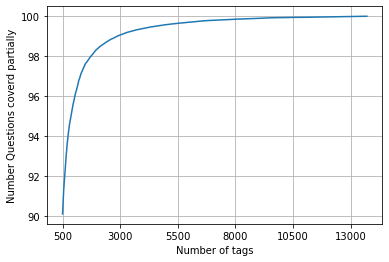

with  5500 tags we are covering  99.062 % of questions


In [15]:
fig, ax = plt.subplots()
ax.plot(questions_explained)
xlabel = list(500+np.array(range(-50,450,50))*50)
ax.set_xticklabels(xlabel)
plt.xlabel("Number of tags")
plt.ylabel("Number Questions coverd partially")
plt.grid()
plt.show()
# you can choose any number of tags based on your computing power, minimun is 50(it covers 90% of the tags)
print("with ",5500,"tags we are covering ",questions_explained[50],"% of questions")

In [16]:
ml_yx = tag_selection(500)
print("number of questions that are not covered :", question_covered(500),"out of ", total_qns)

number of questions that are not covered : 29632 out of  300000


In [17]:
print("Number of tags in sample :", ml_y.shape[1])
print("number of tags taken :", ml_yx.shape[1],"(",(ml_yx.shape[1]/ml_y.shape[1])*100,"%)")

Number of tags in sample : 26950
number of tags taken : 500 ( 1.855287569573284 %)


__ We consider top 15% tags which covers  99% of the questions __

<h2> 4.2 Split the data into test and train (80:20) </h2>

In [30]:
total_size = preprocessed_data.shape[0]
train_size=int(0.80*total_size)

X_train = preprocessed_data.head(train_size)
X_test = preprocessed_data.tail(total_size - train_size)

y_train = ml_yx[0:train_size,:]
y_test = ml_yx[train_size:total_size,:]

In [31]:
print("Number of data points in train data :", y_train.shape)
print("Number of data points in test data :", y_test.shape)

Number of data points in train data : (300000, 500)
Number of data points in test data : (0, 500)


<h2> 4.3 Featurizing data </h2>

<h3> 4.3.1 BOW upto 4 grams </h2>

In [ ]:
vect_bow = CountVectorizer(min_df=0.00009, max_features=20000,tokenizer = lambda x: x.split(), ngram_range=(1,4))
X_train_bow = vect_bow.fit_transform(X_train['question'])
X_test_bow = vect_bow.transform(X_test['question'])

<h3>4.3 Storing the featured data in temporary files </h3>

In [19]:
import joblib
joblib.dump(X_train_bow, 'x_train_BOW4_2400_.pkl')

joblib.dump(X_test_bow, 'x_test_BOW4_600.pkl')

joblib.dump(y_train, 'y_train_2400k.pkl')

joblib.dump(y_test, 'y_test_600k.pkl') 

['y_test_600k.pkl']

In [5]:
import joblib
X_train_bow = joblib.load('x_train_BOW4_2400k_.pkl')

X_test_bow = joblib.load('x_test_BOW4_600k.pkl')

y_train = joblib.load('y_train_2400k.pkl')

y_test = joblib.load('y_test_600k.pkl')

In [6]:
print("Dimensions of train data X:",X_train_bow.shape, "Y :",y_train.shape)
print("Dimensions of test data X:",X_test_bow.shape,"Y:",y_test.shape)

Dimensions of train data X: (240000, 20000) Y : (240000, 500)
Dimensions of test data X: (60000, 20000) Y: (60000, 500)


<h2> 4.4 Applying Logistic Regression with OneVsRest Classifier </h2>

In [7]:
# this will be taking so much time try not to run it, download the lr_with_equal_weight.pkl file and use to predict
# This takes about 6-7 hours to run.
# Done using 300,000 points
start = datetime.now()
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'))
classifier.fit(X_train_bow, y_train)
predictions = classifier.predict(X_test_bow)
 
print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("macro f1 score :",metrics.f1_score(y_test, predictions, average = 'macro'))
print("micro f1 score :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))
print("Precision recall report :\n",metrics.classification_report(y_test, predictions))
print("Time taken to run this cell :", datetime.now() - start)

accuracy : 0.10813333333333333
macro f1 score : 0.2976219296857696
micro f1 score : 0.3926652353996396
hamming loss : 0.0049317
Precision recall report :
               precision    recall  f1-score   support

           0       0.41      0.41      0.41      4679
           1       0.53      0.53      0.53      4217
           2       0.62      0.60      0.61      4057
           3       0.51      0.51      0.51      3790
           4       0.82      0.84      0.83      3436
           5       0.69      0.67      0.68      3186
           6       0.44      0.45      0.44      2031
           7       0.66      0.66      0.66      1976
           8       0.48      0.47      0.48      1824
           9       0.50      0.50      0.50      1720
          10       0.62      0.65      0.63      1755
          11       0.31      0.28      0.29      1734
          12       0.22      0.22      0.22      1637
          13       0.38      0.38      0.38      1425
          14       0.36      0.37 

<h2> 4.5 Applying Logistic Regression with OneVsRest Classifier(Optimizing hyperparameter alpha with gridSearchCV ) </h2>

In [3]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as randint
#https://stackoverflow.com/a/53554462/12066749
#Since the SGDClassifier is inside a OneVsRestClassifier and that's the estimator
#we send to the GridSearchCV, but the SGDClassifier parameters can't be accessed by gridSearchcv in this way.
#By using the above method, the SGDClassifier model is stored as an attribute named estimator inside the 
#OneVsRestClassifier model, so that the gridSearchcv can access its parameters.
params = {"estimator__alpha" : [0.00001,0.0001,0.001, 0.01, 0.1, 1, 10]}

start = datetime.now()
clf = OneVsRestClassifier(SGDClassifier(loss='log', penalty='l1',max_iter = 10000))
grid = GridSearchCV(clf,params,cv = 10,n_jobs = -1)
grid.fit(X_train_bow, y_train)
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 15:45:11.757009


In [8]:
import joblib
joblib.dump(grid.best_estimator_, 'grid_classify.pkl')

['grid_classify.pkl']

In [7]:
#Only for 300000 data points due to time and computation limitation as 500000 points took more than 24 hours
clf_opt = grid.best_estimator_
pred_grid = clf_opt.predict(X_test_bow)

print("accuracy :",metrics.accuracy_score(y_test,pred_grid))
print("macro f1 score :",metrics.f1_score(y_test, pred_grid, average = 'macro'))
print("micro f1 score :",metrics.f1_score(y_test, pred_grid, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,pred_grid))
print("Precision recall report :\n",metrics.classification_report(y_test, pred_grid))

accuracy : 0.18636666666666668
macro f1 score : 0.20670520362449507
micro f1 score : 0.3764774473949224
hamming loss : 0.0031370666666666667
Precision recall report :
               precision    recall  f1-score   support

           0       0.51      0.07      0.12      4679
           1       0.79      0.29      0.43      4217
           2       0.82      0.44      0.57      4057
           3       0.75      0.39      0.51      3790
           4       0.89      0.72      0.80      3436
           5       0.85      0.65      0.74      3186
           6       0.60      0.11      0.19      2031
           7       0.85      0.59      0.70      1976
           8       0.75      0.28      0.41      1824
           9       0.76      0.37      0.49      1720
          10       0.82      0.57      0.68      1755
          11       0.48      0.09      0.15      1734
          12       0.39      0.07      0.11      1637
          13       0.61      0.15      0.24      1425
          14       0.

<h2> 4.4 Applying Linear SVM with OneVsRest Classifier </h2>

In [22]:
# this will be taking so much time try not to run it, download the lr_with_equal_weight.pkl file and use to predict
# This takes about 6-7 hours to run.
start = datetime.now()
classifier = OneVsRestClassifier(SGDClassifier(loss='hinge', alpha=0.00001, penalty='l1'))
classifier.fit(X_train_bow, y_train)
predictions = classifier.predict(X_test_bow)

print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("macro f1 score :",metrics.f1_score(y_test, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))
print("Precision recall report :\n",metrics.classification_report(y_test, predictions))
print("Time taken to run this cell :", datetime.now() - start)

accuracy : 0.11133333333333334
macro f1 score : 0.30185393719287046
micro f1 scoore : 0.3947989174067422
hamming loss : 0.004874733333333333
Precision recall report :
               precision    recall  f1-score   support

           0       0.42      0.42      0.42      4679
           1       0.53      0.52      0.53      4217
           2       0.61      0.60      0.60      4057
           3       0.52      0.51      0.52      3790
           4       0.83      0.83      0.83      3436
           5       0.69      0.67      0.68      3186
           6       0.43      0.44      0.43      2031
           7       0.65      0.71      0.68      1976
           8       0.50      0.48      0.49      1824
           9       0.50      0.51      0.51      1720
          10       0.64      0.65      0.64      1755
          11       0.31      0.28      0.30      1734
          12       0.22      0.20      0.21      1637
          13       0.39      0.36      0.38      1425
          14       0.


Time taken to run this cell : 1:10:34.121624


In [10]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Model", "macro f1 score", "micro f1 score", "hamming loss"]

table.add_row(["LR(BOW upto 4 grams)","0.2976", "0.3926" , "0.0049" ])
table.add_row(["LR(alpha gridsearchcv)","0.2067" , "0.3764" ,"0.0031" ])
table.add_row(["SVM", "0.3018" , "0.3948" , "0.0048"])
print(table)

+------------------------+----------------+----------------+--------------+
|         Model          | macro f1 score | micro f1 score | hamming loss |
+------------------------+----------------+----------------+--------------+
|  LR(BOW upto 4 grams)  |     0.2976     |     0.3926     |    0.0049    |
| LR(alpha gridsearchcv) |     0.2067     |     0.3764     |    0.0031    |
|          SVM           |     0.3018     |     0.3948     |    0.0048    |
+------------------------+----------------+----------------+--------------+


DONE:
<ol>
    <li> Use bag of words upto 4 grams and compute the micro f1 score with Logistic regression(OvR) </li>
    <li> Perform hyperparam tuning on alpha (or lambda) for Logistic regression to improve the performance using GridSearch  </li>
    <li> Try OneVsRestClassifier  with Linear-SVM (SGDClassifier with loss-hinge)</li>
</ol>


<h3 style="color:red"> NOTE: Only 3000000 datapoints(questions)have been taken due to time and computation limitations. </h3>